# IMDB 리뷰 감성 분류하기


    keras에서 제공하는 imdb 활용.
    리뷰가 긍정이면 1, 부정이면 0으로 표시한 레이블을 가지고 학습.

## 1. 데이터 처리

In [5]:
from tensorflow.keras.datasets import imdb

(X_train, y_train) , (X_test, y_test) = imdb.load_data()

In [6]:
print(f"train size : ",len(X_train))
print(f"test size : ",len(X_test))
print(f"category size :",max(y_train)+1)

train size :  25000
test size :  25000
category size : 2


In [7]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


이미 토큰화와 정수 인코딩이 진행된 데이터.

레이블이 1 => 긍정 리뷰

max length : 2494
mean length : 238.71364


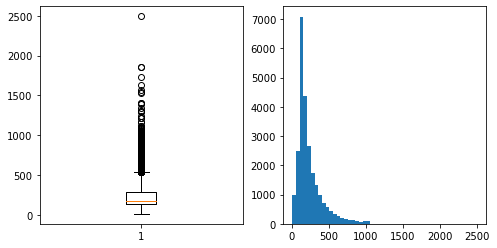

In [8]:
import matplotlib.pyplot as plt
import numpy as np

lens = [len(word) for word in X_train]

print(f"max length : {np.max(lens)}")
print(f"mean length : {np.mean(lens)}")

fig , axes = plt.subplots(1,2,figsize=(8,4))

axes[0].boxplot(lens)
axes[1].hist(lens,bins=50);

In [9]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([12500, 12500]))

In [10]:
# 각 단어와 맴핑되는 정수 -> get_word_index. 
# IMDB 리뷰 데이터셋의 규칙은 +3 을 해야됨.
# 0,1,2,3은 특별한 규칙으로 취급. -> 정수 4가 가장 빈도수가 높은 단어

word_to_idx = imdb.get_word_index()
index_to_word = {} 
for key,value in word_to_idx.items():
    index_to_word[value+3] = key

print(f"1st frequence : {index_to_word[4]}")

1st frequence : the


## 2. GRU 로 IMDB 리뷰 감성 분류

    단어 집합 크기를 10,000으로, 리뷰 최대 길이를 500 으로 제한.

In [11]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_len = 500

(X_train,y_train), (X_test,y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train,max_len)
X_test = pad_sequences(X_test,max_len)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense

model = Sequential()
model.add(Embedding(vocab_size,100))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=4)
mc = ModelCheckpoint('GRU_model.h5',monitor='val_acc',mode='max',
                     verbose=1,save_best_only=True)

In [4]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(X_train,y_train,epochs=15,callbacks=[es,mc],
                    batch_size=60,validation_split=0.2)


Epoch 1/15
334/334 [==============================] - 280s 836ms/step - loss: 0.5811 - acc: 0.6688 - val_loss: 0.3518 - val_acc: 0.8470

Epoch 00001: val_acc improved from -inf to 0.84700, saving model to GRU_model.h5
Epoch 2/15
334/334 [==============================] - 340s 1s/step - loss: 0.3212 - acc: 0.8622 - val_loss: 0.3716 - val_acc: 0.8414

Epoch 00002: val_acc did not improve from 0.84700
Epoch 3/15
334/334 [==============================] - 338s 1s/step - loss: 0.2585 - acc: 0.9031 - val_loss: 0.3146 - val_acc: 0.8742

Epoch 00003: val_acc improved from 0.84700 to 0.87420, saving model to GRU_model.h5
Epoch 4/15
334/334 [==============================] - 352s 1s/step - loss: 0.2275 - acc: 0.9178 - val_loss: 0.3143 - val_acc: 0.8850

Epoch 00004: val_acc improved from 0.87420 to 0.88500, saving model to GRU_model.h5
Epoch 5/15
334/334 [==============================] - 351s 1s/step - loss: 0.1709 - acc: 0.9392 - val_loss: 0.3229 - val_acc: 0.8882

Epoch 00005: val_acc improve

In [14]:
from tensorflow.keras.models import load_model

loaded_model = load_model('GRU_model.h5')
print(f"test accuracy : {loaded_model.evaluate(X_test,y_test)[1]}")

782/782 [==============================] - 173s 221ms/step - loss: 0.4225 - acc: 0.8786
test accuracy : 0.8785600066184998


In [25]:
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences

def sentiment_predict(sent) :
    
    sent = re.sub('[^0-9a-zA-Z ]','',sent).lower()
    
    encoded = []
    for word in sent.split() :
        
        try : 
            if word_to_idx[word] <= 10000 :
                encoded.append(word_to_idx[word]+3)
            else :
                encoded.append(2)
        except KeyError:
            encoded.append(2)
    
    
    sent = pad_sequences([encoded],max_len)
    score = float(loaded_model.predict(sent))
    
    if score > 0.5 :
        print(f"{round(score * 100,2)} % positive review")
    else :
        print(f"{round((1-score) * 100,2)} % negative review")

In [17]:
positive_ironman = """Rest assured, Iron Man is an absolutely amazing movie. 
                    I won't dare spoil any of this remarkable movie for you but I do recommend it as highly as I possibly can. 
                    Marvel needed to get in to the solo movie making business long ago. 
                    Instead of leasing out their characters to other studios, they're making movies themselves. 
                    Most everyone knows Iron Man is their first effort and what a great lead off film! This movie helps take the comic book genre to the highest level. 
                    Just like they did in the books, they reinvent standard epic adventure by "Marvelizing" characters and making them more believable. 
                    The Spider-Man and the X-Men movies did this to a degree but only as far as their respective studios wished to stay true to the source material. 
                    Anything added or amended was for the benefit of the live action adaptation. Director Sam Raimi pulled this off by talking to the summer crowd, not down to them with the Spider-Man series. 
                    Jon Favreau has done the same thing here but I think he's done it even better. Raimi intentionally threw in a little cheese. 
                    Favreau adds nice bits of humor but not too much. He also grounds the action and the suit of armor in firm reality. 
                    I've said it before but it's brave to reach for the highest common denominator with a big budget film and Favreau delivers a movie with as much feeling as it has action and intensity. 
                    Needless to say, Robert Downey Jr. and company deliver the goods. 
                    It's a movie that has a wonderful balance that delivers intelligence with its fun.
                    """

In [26]:
sentiment_predict(positive_ironman)

54.1 % positive review
